In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [18]:
print(f'Train shape: {train.shape}')
print(f'Test shape: {test.shape}')

Train shape: (3000, 18)
Test shape: (3000, 17)


In [19]:
train.head()

,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score
0,TRAIN_0000,F,72,161.49,58.47,279.84,165,100,143.35,0.87,moderate,ex-smoker,high blood pressure,diabetes,sleep difficulty,bachelors degree,NaN,0.63
1,TRAIN_0001,M,88,179.87,77.60,257.37,178,111,146.94,0.07,moderate,ex-smoker,NaN,diabetes,normal,graduate degree,NaN,0.83
2,TRAIN_0002,M,47,182.47,89.93,226.66,134,95,142.61,1.18,light,ex-smoker,NaN,NaN,normal,high school diploma,9.0,0.70
3,TRAIN_0003,M,69,185.78,68.63,206.74,158,92,137.26,0.48,intense,ex-smoker,high blood pressure,NaN,oversleeping,graduate degree,NaN,0.17
4,TRAIN_0004,F,81,164.63,71.53,255.92,171,116,129.37,0.34,moderate,ex-smoker,diabetes,diabetes,sleep difficulty,bachelors degree,NaN,0.36


In [ ]:
def missing_ratio(df):
    return (df.isnull().mean() * 100).round(2)

summary = pd.DataFrame({
    'Data Type': train.dtypes,
    'Missing %': missing_ratio(train),
    'Unique Count' : train.nunique()
})

summary.sort_values("Missing %", ascending=False)

,Data Type,Missing %,Unique Count
family_medical_history,object,49.53,3
medical_history,object,42.97,3
mean_working,float64,34.40,13
edu_level,object,20.23,3
gender,object,0.00,2
ID,object,0.00,3000
age,int64,0.00,73
height,float64,0.00,1828
weight,float64,0.00,1986
cholesterol,float64,0.00,2215


In [21]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3000.0,53.068000,20.672070,17.00,35.0000,53.000,72.0000,89.00
height,3000.0,168.585687,9.351876,141.13,161.8000,168.115,175.3525,195.28
weight,3000.0,72.486680,13.167222,36.32,63.0350,71.240,81.8325,120.88
cholesterol,3000.0,233.910523,24.333434,148.81,216.9275,234.255,250.3775,313.35
systolic_blood_pressure,3000.0,146.144333,15.845310,97.00,135.0000,146.000,158.0000,191.00
diastolic_blood_pressure,3000.0,95.504000,9.895283,60.00,89.0000,95.000,102.0000,124.00
glucose,3000.0,126.467720,18.536844,70.05,113.9125,126.555,139.1800,185.74
bone_density,3000.0,0.933367,0.444783,-0.22,0.5600,0.940,1.3000,2.00
mean_working,1968.0,8.716972,1.628944,4.00,8.0000,9.000,10.0000,16.00
stress_score,3000.0,0.482130,0.288252,0.00,0.2300,0.480,0.7300,1.00


In [22]:
cat_cols = train.select_dtypes(include='object').columns.drop('ID')

for col in cat_cols:
    print(f"\n▶ {col} value counts:")
    print(train[col].value_counts().head())


▶ gender value counts:
gender
F    1508
M    1492
Name: count, dtype: int64

▶ activity value counts:
activity
moderate    1431
light        894
intense      675
Name: count, dtype: int64

▶ smoke_status value counts:
smoke_status
ex-smoker         1177
non-smoker        1039
current-smoker     784
Name: count, dtype: int64

▶ medical_history value counts:
medical_history
high blood pressure    697
heart disease          508
diabetes               506
Name: count, dtype: int64

▶ family_medical_history value counts:
family_medical_history
diabetes               615
high blood pressure    480
heart disease          419
Name: count, dtype: int64

▶ sleep_pattern value counts:
sleep_pattern
normal              1557
sleep difficulty    1019
oversleeping         424
Name: count, dtype: int64

▶ edu_level value counts:
edu_level
high school diploma    924
bachelors degree       880
graduate degree        589
Name: count, dtype: int64


In [23]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_cols = train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train.select_dtypes(include=['object']).columns

preprocess = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_cols),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols)
])

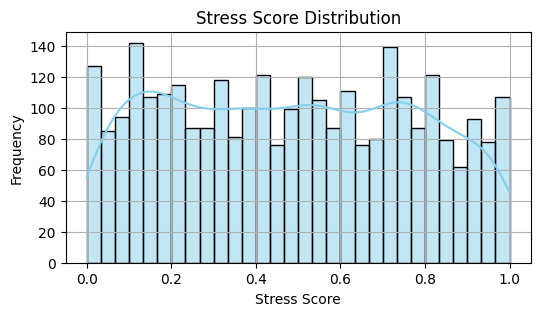

In [24]:
plt.figure(figsize=(6, 3))
sns.histplot(train["stress_score"], bins=30, kde=True, color="skyblue")
plt.title("Stress Score Distribution")
plt.xlabel("Stress Score")
plt.ylabel("Frequency")
plt.grid(True)

In [25]:
from scipy.stats import skew, kurtosis

target = train["stress_score"]
print(target.describe())

print(f"Skewness (왜도): {skew(target):.2f}")
print(f"Kurtosis (첨도): {kurtosis(target):.2f}")

count    3000.000000
mean        0.482130
std         0.288252
min         0.000000
25%         0.230000
50%         0.480000
75%         0.730000
max         1.000000
Name: stress_score, dtype: float64
Skewness (왜도): 0.06
Kurtosis (첨도): -1.19


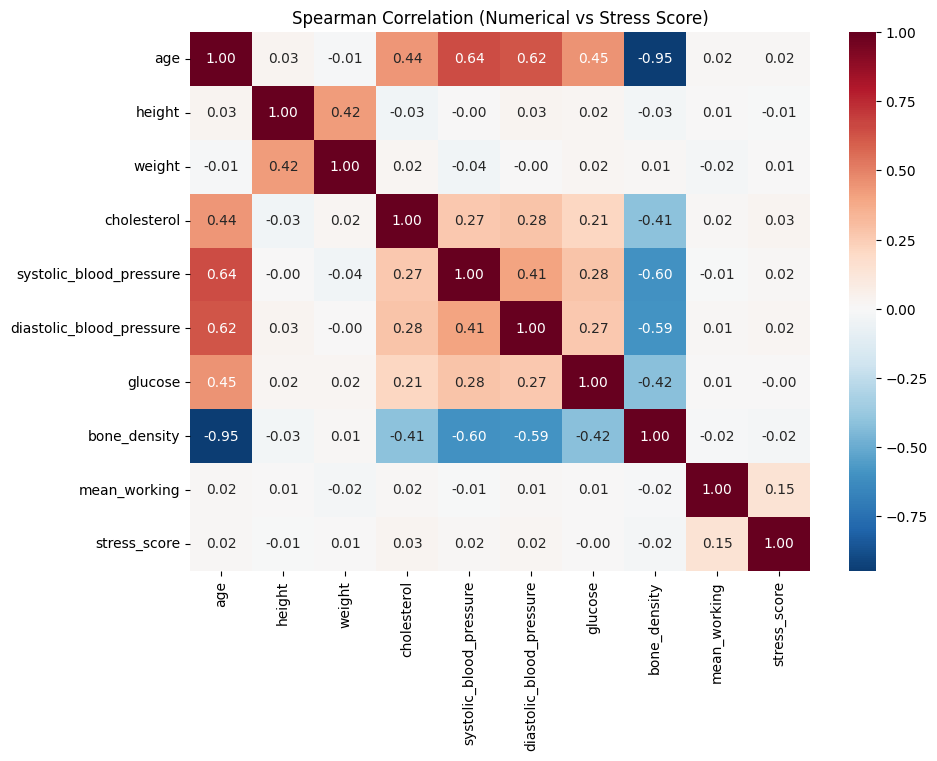

mean_working                0.145073
cholesterol                 0.026804
diastolic_blood_pressure    0.019255
age                         0.019001
systolic_blood_pressure     0.017789
weight                      0.007825
glucose                    -0.003056
height                     -0.010767
bone_density               -0.022841
Name: stress_score, dtype: float64

In [26]:
num_cols = train.select_dtypes(include=[np.number]).columns.drop("stress_score")

corr_matrix = train[num_cols.tolist() + ["stress_score"]].corr(method="spearman")

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap="RdBu_r", center=0, fmt=".2f")
plt.title("Spearman Correlation (Numerical vs Stress Score)")
plt.show()

corr_matrix["stress_score"].drop("stress_score").sort_values(ascending=False)

0       172.0475
1       173.3275
2       149.5675
3       148.5000
4       168.0725
          ...   
2995    163.7550
2996    134.4500
2997    150.4975
2998    162.9975
2999    163.1375
Length: 3000, dtype: float64